# Определение приоритетных гипотез для увеличения выручки

Было решено увеличить прибыль интернет-магазина. Для этого было сформировано несколько гипотез, которые бы потенциально могли бы увеличилить выручку. Их надо расставить по приоритету, выбрать самые приоритетные, провести A/B-тест и провести анализ его результатов.

В нашем распоряжении три таблицы: таблица с гипотезами и оценкой их параметров, таблица с данными о том, какие пользователи когда совершали покупки и к каким группам они относятся, а также таблица с количеством покупок в данную дату в данной группе
## Цель
 Приоритизировать гипотезы и определить результаты A/B-теста на данный момент

## Задачи
 - С помощью фреймфорков выделить главные гипотезы
 - Провести предобработку данных
 - Посчитать кумулятивные метрики, проанализировать их и сделать выводы
 - Определить предел количества, стоимости заказов, убрать аномалии
 - Посчить статистическую значимость разницы между группами по сырым и отфильтрованным данным, оценить прибыльность групп
 - Проанализировать результаты A/B-теста и решить, останавливать его или нет


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime

## Определение приоритета гипотез

In [ ]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Считаем приоритетность гипотез по фреймворку ICE, как отношение произведения параметров Impact и Confidence, показывающих насколько сильно изменения повлияют на пользователей и уверенность в оценках других параметров соответственно, к параметру Efforts, который определяет сложность проверки гипотезы.

In [ ]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
pd.options.display.max_colwidth = 150
display(hypothesis.sort_values(by='ICE',ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Согласно фреймворку ICE самыми приоритетными гипотезами будут запуск скидок на день рождения и добавление двух новых каналов привлечения.

Считаем приоритетность гипотез по фреймворку RICE, как произведение параметров Reach, Impact и Confidence, деленное на Efforts.

In [ ]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
pd.options.display.max_colwidth = 150
hypothesis.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Согласно RICE самыми приоритетными задачами будут добавление формы подписки на все основные страницы и блоков рекомендаций товаров.

Так как у первых гипотез, ранжированных по фреймворку RICE, параметр reach заметно больше первых гипотез, сортированных по ICE, а остальные параметры сопоставимы, следует приоритезировать первые, то есть добавление формы подписки на все основные страницы и добавление блоков рекомендаций.

Когда мы считаем приоритетность гипотез с помощью фреймворка RICE, мы учитываем количество пользователей, которых затронет изменение, в отличие от ICE. Поэтому при применении RICE на первые места вышли те гипотезы, которые затронут наибольшее количество клиентов.

## Анализ результатов A/B-теста

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')

display(orders.head(5))

orders['date'].unique()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


array(['2019-08-15', '2019-08-16', '2019-08-01', '2019-08-22',
       '2019-08-17', '2019-08-23', '2019-08-02', '2019-08-18',
       '2019-08-24', '2019-08-03', '2019-08-25', '2019-08-28',
       '2019-08-19', '2019-08-06', '2019-08-26', '2019-08-29',
       '2019-08-04', '2019-08-20', '2019-08-09', '2019-08-07',
       '2019-08-30', '2019-08-05', '2019-08-27', '2019-08-21',
       '2019-08-08', '2019-08-10', '2019-08-31', '2019-08-11',
       '2019-08-12', '2019-08-13', '2019-08-14'], dtype=object)

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')

visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Имеем две таблицы: таблица с информацией о заказах и о покупателях. В первой хранятся идентификаторы покупателей, транзакций, а также дата и группа, в которой находится данный покупатель. Во второй таблице данные о количестве покупателей в указанную дату и группа, к которой они принадлежат.

Рассматриваемый период - август 2019-ого года.

In [ ]:
print(orders.duplicated().sum())

print(visitors.duplicated().sum())

0
0


In [ ]:
print(orders.isna().sum())

print(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


Пропусков и дубликатов нет.

In [ ]:
groupA = (orders.query('group=="A"')['visitorId']).to_list()

test =[]
count=0

for i in range(0,len(orders.query('group=="B"')['visitorId'])):
    if(orders.query('group=="B"')['visitorId'].reset_index(drop=True)[i] in groupA):
        test.append(orders.query('group=="B"')['visitorId'].reset_index(drop=True)[i])

for visitorId in pd.DataFrame(test,columns=['Id'])['Id'].unique():
    display(orders[orders['visitorId']==visitorId])
    count+=len(orders[orders['visitorId']==visitorId])
int(count)

,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,300,B
1183,1458356232,963407295,2019-08-14,4940,A


,transactionId,visitorId,date,revenue,group
23,4252514150,351125977,2019-08-15,15185,B
453,3075639014,351125977,2019-08-06,4485,A


,transactionId,visitorId,date,revenue,group
24,1162046357,3234906277,2019-08-15,7555,B
249,1360774578,3234906277,2019-08-18,7555,A


,transactionId,visitorId,date,revenue,group
27,1630050528,237748145,2019-08-15,7620,B
41,2594268419,237748145,2019-08-15,1090,A
590,3702128013,237748145,2019-08-20,1290,A
716,972407388,237748145,2019-08-27,470,A
1097,3357467820,237748145,2019-08-12,340,A


,transactionId,visitorId,date,revenue,group
32,3666913472,2038680547,2019-08-15,1680,B
117,722060263,2038680547,2019-08-22,760,A
227,4267573899,2038680547,2019-08-17,3470,A
390,2415738512,2038680547,2019-08-25,270,A
577,3932236947,2038680547,2019-08-04,2800,B
578,1570911533,2038680547,2019-08-04,1530,A
605,1215730747,2038680547,2019-08-04,2540,A
624,1666104258,2038680547,2019-08-29,2420,B


,transactionId,visitorId,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


,transactionId,visitorId,date,revenue,group
61,1251767592,2712142231,2019-08-16,790,B
1173,3612788481,2712142231,2019-08-14,2490,A


,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


,transactionId,visitorId,date,revenue,group
85,1701653566,276558944,2019-08-22,12350,B
1093,3894437543,276558944,2019-08-12,5050,A


,transactionId,visitorId,date,revenue,group
94,252633006,457167155,2019-08-22,5970,B
95,372616894,457167155,2019-08-22,987,B
256,2370268995,457167155,2019-08-23,1620,A
1074,3571123442,457167155,2019-08-12,1280,B


,transactionId,visitorId,date,revenue,group
111,2736731761,3062433592,2019-08-01,14489,B
112,1638982251,3062433592,2019-08-01,8470,B
1096,3075787818,3062433592,2019-08-12,32610,B
1098,1092419081,3062433592,2019-08-12,16920,A
1100,1671551244,3062433592,2019-08-12,2970,B


,transactionId,visitorId,date,revenue,group
139,4141167864,2716752286,2019-08-01,7990,B
197,2632798290,2716752286,2019-08-02,2220,A


,transactionId,visitorId,date,revenue,group
189,4189935502,1648269707,2019-08-17,290,B
279,1101659272,1648269707,2019-08-18,860,A


,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
246,437656952,199603092,2019-08-02,3488,B
823,2971973105,199603092,2019-08-27,2790,A
1102,1941707234,199603092,2019-08-12,6438,A


,transactionId,visitorId,date,revenue,group
29,2220299125,3803269165,2019-08-15,700,A
252,473864496,3803269165,2019-08-23,2360,B
693,3244441077,3803269165,2019-08-09,590,B
1171,2860596918,3803269165,2019-08-14,6613,B
1172,3898641900,3803269165,2019-08-14,790,B


,transactionId,visitorId,date,revenue,group
219,2139320439,2686716486,2019-08-23,10960,A
254,1545495643,2686716486,2019-08-23,34340,B


,transactionId,visitorId,date,revenue,group
265,3743515850,2579882178,2019-08-18,1922,A
267,131747281,2579882178,2019-08-18,19538,B


,transactionId,visitorId,date,revenue,group
310,3532704780,3984495233,2019-08-03,20219,B
536,3925488023,3984495233,2019-08-04,20219,A
698,429858801,3984495233,2019-08-05,14495,A


,transactionId,visitorId,date,revenue,group
327,3909269888,1668030113,2019-08-28,5070,B
782,2339954598,1668030113,2019-08-27,2600,A
1182,2682156369,1668030113,2019-08-14,1290,B


,transactionId,visitorId,date,revenue,group
129,1665445278,1738359350,2019-08-22,3070,A
330,3006440800,1738359350,2019-08-28,890,B
861,2229298010,1738359350,2019-08-30,2000,B


,transactionId,visitorId,date,revenue,group
359,615966907,3717692402,2019-08-28,910,B
809,3362484972,3717692402,2019-08-21,2400,A
838,1607016207,3717692402,2019-08-21,4170,B
938,1575313118,3717692402,2019-08-08,1540,B
1175,1373388206,3717692402,2019-08-14,2400,B


,transactionId,visitorId,date,revenue,group
133,3060563671,2458001652,2019-08-22,5190,A
380,1177690313,2458001652,2019-08-25,2385,B
454,3755354294,2458001652,2019-08-06,7349,B
456,543654048,2458001652,2019-08-06,1620,A
483,2280027650,2458001652,2019-08-06,6681,B
611,1244084011,2458001652,2019-08-04,340,A
692,3586870909,2458001652,2019-08-09,5227,B
727,3959083601,2458001652,2019-08-07,17379,A
883,2412219836,2458001652,2019-08-05,2420,B
916,527333943,2458001652,2019-08-08,5227,B


,transactionId,visitorId,date,revenue,group
33,486237576,2378935119,2019-08-15,1650,A
118,4233533907,2378935119,2019-08-22,3390,A
179,1784270968,2378935119,2019-08-17,310,A
391,2213813903,2378935119,2019-08-25,21220,B
435,2430683444,2378935119,2019-08-28,20450,B
473,3224706027,2378935119,2019-08-28,4410,B
697,1612868255,2378935119,2019-08-09,30649,B
1029,469609643,2378935119,2019-08-10,58220,A
1031,1661772358,2378935119,2019-08-10,2640,B


,transactionId,visitorId,date,revenue,group
402,371848868,1294878855,2019-08-28,3080,B
677,2348589867,1294878855,2019-08-09,27390,A
1015,4262851755,1294878855,2019-08-31,570,A


,transactionId,visitorId,date,revenue,group
406,1441855393,1404934699,2019-08-03,26980,B
1036,2890600501,1404934699,2019-08-09,8340,B
1044,1814628689,1404934699,2019-08-11,8640,A


,transactionId,visitorId,date,revenue,group
415,1825231501,2587333274,2019-08-06,8870,B
729,2667448076,2587333274,2019-08-07,6170,B
970,3478707774,2587333274,2019-08-08,3600,A
972,2419539947,2587333274,2019-08-08,3600,B


,transactionId,visitorId,date,revenue,group
430,1168756094,3202540741,2019-08-24,3150,A
432,1061451265,3202540741,2019-08-24,5450,B


,transactionId,visitorId,date,revenue,group
225,2931845376,2954449915,2019-08-17,10791,A
455,2781850870,2954449915,2019-08-06,3070,B


,transactionId,visitorId,date,revenue,group
230,3124204494,2927087541,2019-08-23,27550,A
479,1651227034,2927087541,2019-08-24,2190,B


,transactionId,visitorId,date,revenue,group
480,1954636284,2600415354,2019-08-06,1530,B
1008,2316868256,2600415354,2019-08-31,2790,A


,transactionId,visitorId,date,revenue,group
496,2825038272,3951559397,2019-08-29,30990,B
497,246848596,3951559397,2019-08-29,2490,A


,transactionId,visitorId,date,revenue,group
370,857639553,2044997962,2019-08-24,2540,A
516,3754751399,2044997962,2019-08-26,6090,B
517,582361359,2044997962,2019-08-26,990,B


,transactionId,visitorId,date,revenue,group
535,3061324106,3972127743,2019-08-04,8401,B
1035,2898835960,3972127743,2019-08-09,8439,A


,transactionId,visitorId,date,revenue,group
269,1067267410,3957174400,2019-08-18,2480,A
561,3241914033,3957174400,2019-08-26,2480,B


,transactionId,visitorId,date,revenue,group
159,1170827001,3891541246,2019-08-22,990,A
606,4007826947,3891541246,2019-08-04,480,B
609,332633624,3891541246,2019-08-04,5020,A


,transactionId,visitorId,date,revenue,group
672,3667885894,1230306981,2019-08-09,6613,A
674,1748608673,1230306981,2019-08-09,6400,B
675,2658936877,1230306981,2019-08-09,6440,B
676,278311817,1230306981,2019-08-09,1690,A
739,2541955961,1230306981,2019-08-09,10137,A


,transactionId,visitorId,date,revenue,group
662,1811671147,4266935830,2019-08-29,78990,A
682,1216533772,4266935830,2019-08-29,78990,B


,transactionId,visitorId,date,revenue,group
685,2972137054,1614305549,2019-08-29,9680,B
687,2663041816,1614305549,2019-08-29,1530,A
767,1278695805,1614305549,2019-08-21,750,A
1195,1947021204,1614305549,2019-08-14,100,A


,transactionId,visitorId,date,revenue,group
450,1750160666,1333886533,2019-08-06,1460,A
688,511953429,1333886533,2019-08-29,2950,B


,transactionId,visitorId,date,revenue,group
730,3335803766,477780734,2019-08-30,7300,A
732,132561921,477780734,2019-08-30,3650,B


,transactionId,visitorId,date,revenue,group
778,2726404029,1602967004,2019-08-27,4740,B
914,2792059099,1602967004,2019-08-08,4040,A


,transactionId,visitorId,date,revenue,group
375,1863281703,1959144690,2019-08-25,16480,A
783,189332332,1959144690,2019-08-27,16480,B


,transactionId,visitorId,date,revenue,group
805,2726113349,1801183820,2019-08-05,100,B
879,1197739160,1801183820,2019-08-05,390,A


,transactionId,visitorId,date,revenue,group
814,1759418862,4186807279,2019-08-21,18560,B
819,380064637,4186807279,2019-08-27,13740,B
1167,3757656646,4186807279,2019-08-14,4990,A


,transactionId,visitorId,date,revenue,group
829,2514024187,3766097110,2019-08-30,980,A
832,2470658885,3766097110,2019-08-30,360,B


,transactionId,visitorId,date,revenue,group
304,609915801,2780786433,2019-08-28,1200,A
548,430186476,2780786433,2019-08-29,1580,A
857,847315305,2780786433,2019-08-27,540,B


,transactionId,visitorId,date,revenue,group
858,192721366,1316129916,2019-08-27,93940,A
900,3922986948,1316129916,2019-08-27,830,B


,transactionId,visitorId,date,revenue,group
525,3031564664,393266494,2019-08-19,21550,A
936,936917445,393266494,2019-08-08,2190,B
1189,4082620617,393266494,2019-08-14,31550,B


,transactionId,visitorId,date,revenue,group
842,2076434956,3941795274,2019-08-21,990,A
973,698171827,3941795274,2019-08-22,1320,B


,transactionId,visitorId,date,revenue,group
1009,2670069237,232979603,2019-08-31,2640,B
1013,83566152,232979603,2019-08-31,60,A


,transactionId,visitorId,date,revenue,group
627,4212256267,4120364173,2019-08-29,39800,A
1021,969750843,4120364173,2019-08-31,15500,B


,transactionId,visitorId,date,revenue,group
200,2066718132,3656415546,2019-08-23,2845,A
1042,265631116,3656415546,2019-08-11,250,B


,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
1070,1473132782,4069496402,2019-08-12,640,B


,transactionId,visitorId,date,revenue,group
1122,3620682463,2654030115,2019-08-13,1980,B
1156,1254962016,2654030115,2019-08-14,1980,A


,transactionId,visitorId,date,revenue,group
325,4276811111,818047933,2019-08-28,3460,A
1163,2357685128,818047933,2019-08-14,400,B


,transactionId,visitorId,date,revenue,group
1162,1277417350,3963646447,2019-08-14,6385,A
1165,2289555915,3963646447,2019-08-14,7485,B


,transactionId,visitorId,date,revenue,group
844,3734714128,471551937,2019-08-05,22950,A
1166,2676541142,471551937,2019-08-14,3460,B


,transactionId,visitorId,date,revenue,group
1178,4052155355,2949041841,2019-08-14,190,A
1184,1329499668,2949041841,2019-08-14,10380,B


181

In [ ]:
orders['visitorId'] = orders.groupby('visitorId')['group'].nunique().reset_index().query('group==1')

orders = orders.dropna().reset_index(drop=True)

display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,5.114589e+06,2019-08-15,1650,B
1,2804400009,6.958315e+06,2019-08-15,730,B
2,3797467345,1.168549e+07,2019-08-15,9759,B
3,2282983706,3.947535e+07,2019-08-15,2308,B
4,182168103,4.720641e+07,2019-08-15,2210,B
...,...,...,...,...,...
968,4180327962,4.259831e+09,2019-08-31,3404,A
969,429304275,4.278983e+09,2019-08-10,420,A
970,4067377068,4.279090e+09,2019-08-10,1190,B
971,469609643,4.281248e+09,2019-08-10,58220,A


Удалим всех пользователей, которые совершали покупки в обеих группах.

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'],orders['group']==x['group'])].\
                                     agg({'date':'max','group':'max','visitorId':'nunique','transactionId':'nunique',\
                                          'revenue':'sum'}),axis=1).sort_values(by=['date','group'])
ordersAggregated.columns = ['date','group','visitorCount','orderCount','totalRevenue']
ordersAggregated.head(5)

,date,group,visitorCount,orderCount,totalRevenue
67,2019-08-01,A,22,22,140029
65,2019-08-01,B,19,19,93312
165,2019-08-02,A,41,41,232961
163,2019-08-02,B,43,43,258843
279,2019-08-03,A,64,64,324444


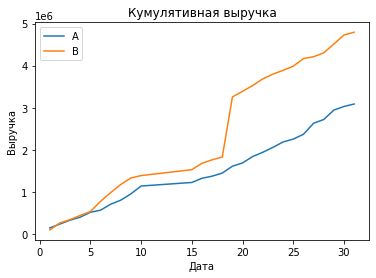

In [ ]:
plt.plot(pd.to_datetime(ordersAggregated.query('group=="A"')['date']).dt.day,\
         ordersAggregated.query('group=="A"')['totalRevenue'],label="A")
plt.plot(pd.to_datetime(ordersAggregated.query('group=="B"')['date']).dt.day,\
         ordersAggregated.query('group=="B"')['totalRevenue'],label="B")

plt.legend()

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка')
plt.show()

Выручки обоих групп росли в течение всего месяца и были сопоставимы. Однако выручка группы B сделала резкий скачок в районе 17-ого числа и стала заметно больше прибыли группы А. Возможно это связано с некоторыми аномально дорогими покупками.

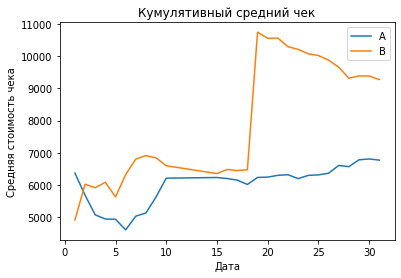

In [ ]:
plt.plot(pd.to_datetime(ordersAggregated.query('group=="A"')['date']).dt.day,\
         ordersAggregated.query('group=="A"')['totalRevenue']/ordersAggregated.query('group=="A"')['orderCount'],label='A')

plt.plot(pd.to_datetime(ordersAggregated.query('group=="B"')['date']).dt.day,\
         ordersAggregated.query('group=="B"')['totalRevenue']/ordersAggregated.query('group=="B"')['orderCount'],label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средняя стоимость чека')
plt.title('Кумулятивный средний чек')
plt.show()

Средний чек для группы B был больше среднего чека группы A почти все время. Как и в графике с кумулятивной выручкой, видим скачок у группы B в районе 17-ого числа.

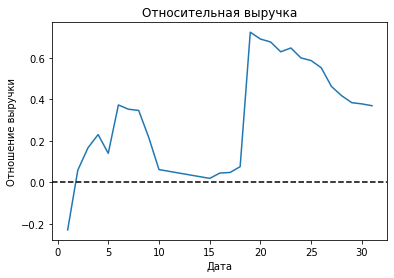

In [ ]:
ARevenue = ordersAggregated[ordersAggregated['group']=='A'][['date','totalRevenue','orderCount','visitorCount']]
BRevenue = ordersAggregated[ordersAggregated['group']=='B'][['date','totalRevenue','orderCount','visitorCount']]

mergedData = ARevenue.merge(BRevenue,left_on='date',right_on='date',how='left',suffixes=['A','B'])

plt.plot(pd.to_datetime(mergedData['date']).dt.day,(mergedData['totalRevenueB']/mergedData['orderCountB'])\
         /(mergedData['totalRevenueA']/mergedData['orderCountA'])-1)

plt.axhline(color='black',linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Отношение выручки')
plt.title('Относительная выручка')
plt.show()

Почти все время с начала месяца выручка группы B превосходила выручку группы A, только в самом начале она и ближе к середине месяца она была меньше. После 15-ого числа виден быстрый рост прибыли от группы B.

Вероятно большие скачки означают какие-то крупные покупки.

[]

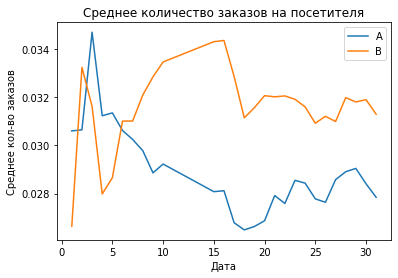

In [ ]:
arrA=[]
for i in range(0,len(orders.query('group=="A"').groupby('date').agg({'transactionId':'count'}).cumsum()\
                     ['transactionId'].to_list())):
    arrA.append((orders.query('group=="A"').groupby('date').agg({'transactionId':'count'}).cumsum()\
                 ['transactionId']).to_list()[i]/(visitors.query('group=="A"')['visitors'].cumsum()).to_list()[i])




arrB=[]

for i in range(0,len(orders.query('group=="B"').groupby('date').agg({'transactionId':'count'}).cumsum()\
                     ['transactionId'].to_list())):
    arrB.append((orders.query('group=="B"').groupby('date').agg({'transactionId':'count'}).cumsum()\
                 ['transactionId']).to_list()[i]/(visitors.query('group=="B"')['visitors'].cumsum()).to_list()[i])

plt.plot(pd.to_datetime(orders['date'].sort_values().unique()).day,arrA,label='A')
plt.plot(pd.to_datetime(orders['date'].sort_values().unique()).day,arrB,label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов')
plt.title('Среднее количество заказов на посетителя')
plt.plot()

В начале, до примерно пятого августа, среднее количество заказов было больше у группы A, затем, до конца исследуемого периода, - у группы B.

[]

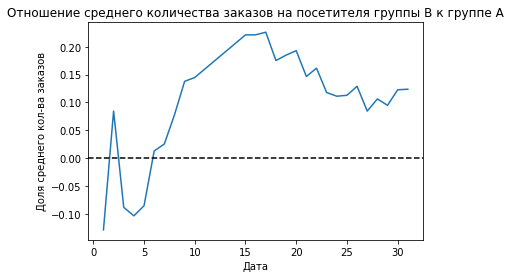

In [ ]:
pd.DataFrame(arrA,columns=['ratio'])
pd.DataFrame(arrB,columns=['ratio'])

plt.plot(pd.to_datetime(orders['date'].sort_values().unique()).day,pd.DataFrame(arrB,columns=['ratio'])/pd.DataFrame(arrA,columns=['ratio'])-1)
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('Дата')
plt.ylabel('Доля среднего кол-ва заказов')
plt.title('Отношение среднего количества заказов на посетителя группы B к группе A')
plt.plot()

После пятого августа среднее количество заказов на посетителя было больше у группы B и к концу месяца превышало на примерно 15%.

[]

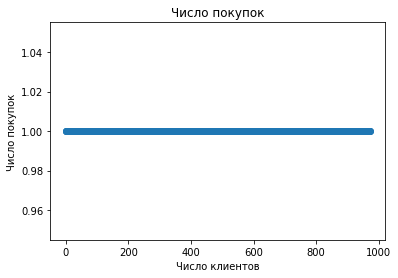

In [ ]:
x_values = pd.Series(range(0,len(orders.groupby('visitorId').agg({'transactionId':'count'}))))

plt.scatter(x_values,orders.groupby('visitorId').agg({'transactionId':'count'}))
plt.xlabel('Число клиентов')
plt.ylabel('Число покупок')
plt.title('Число покупок')
plt.plot()

Все клиенты совершили только одну покупку.

In [ ]:
print(np.percentile(orders.groupby('visitorId').agg({'transactionId':'count'}),[90,95,99]))

[1. 1. 1.]


Будем считать две покупки, как верхнюю границу числа заказов, так как всего 5% покупателей сделали две покупки.

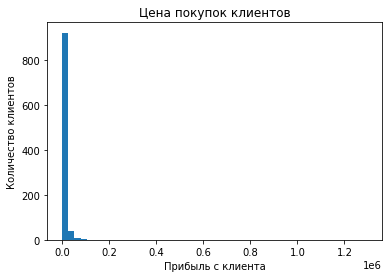

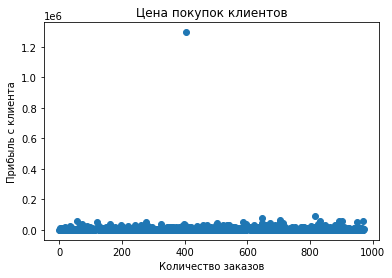

In [ ]:
plt.hist(orders.groupby('visitorId').agg({'revenue':'sum'}),bins=50)
plt.xlabel('Прибыль с клиента')
plt.ylabel('Количество клиентов')
plt.title('Цена покупок клиентов')
plt.show()

plt.scatter(x_values,orders.groupby('visitorId').agg({'revenue':'sum'}))
plt.ylabel('Прибыль с клиента')
plt.xlabel('Количество заказов')
plt.title('Цена покупок клиентов')
plt.ylim()
plt.show()

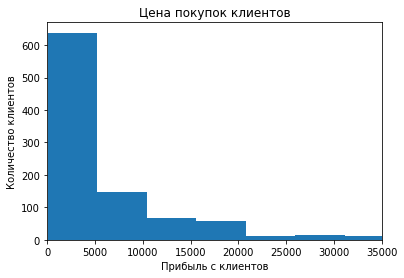

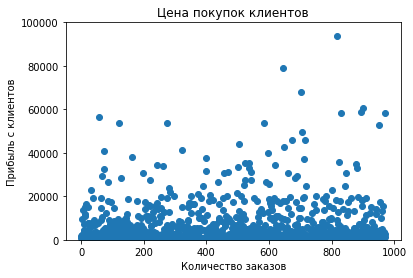

In [ ]:
plt.hist(orders.groupby('visitorId').agg({'revenue':'sum'}),bins=250)
plt.xlabel('Прибыль с клиентов')
plt.ylabel('Количество клиентов')
plt.title('Цена покупок клиентов')
plt.xlim(0,35000)
plt.show()

plt.scatter(x_values,orders.groupby('visitorId').agg({'revenue':'sum'}))
plt.ylabel('Прибыль с клиентов')
plt.xlabel('Количество заказов')
plt.title('Цена покупок клиентов')
plt.ylim([0,100000])
plt.show()

В основном пользователи совершают покупки ценой до 5000 рублей - таких чуть меньше 1000. Почти в 10 раз меньше пользователей с покупками в 20000. Покупателей, которые покупают на большие суммы совсем мало.

In [ ]:
print(np.percentile(orders.groupby('visitorId').agg({'revenue':'sum'}),[90,95,99]))

[17990. 26926. 53904.]


Примем 26926 за верхнюю грань, так как только 5% пользователей покупали на большую сумму.

In [ ]:
ordersPerUsersA = orders.query('group=="A"').groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})

ordersPerUsersA.columns = ['visitorId','orders']

sampleA = pd.concat([ordersPerUsersA['orders'],\
                     pd.Series(0,index=np.arange(ordersAggregated['visitorCount'].sum()\
                                                 -len(ordersPerUsersA['orders'])),name='orders')],axis=0)




In [ ]:
ordersPerUsersB = orders.query('group=="B"').groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})

ordersPerUsersB.columns = ['visitorId','orders']

sampleB = pd.concat([ordersPerUsersB['orders'],\
                     pd.Series(0,index=np.arange(ordersAggregated['visitorCount'].sum()-len(ordersPerUsersB['orders'])),\
                               name='orders')],axis=0)


$H_0$: Различий в среднем количестве заказов на посетителя нет

$H_1$: Группы различаются по среднему количеству заказов

In [ ]:
print('p-value: ',stats.mannwhitneyu(sampleA, sampleB)[1])

print('Отношение среднего числа заказов на пользователя',sampleB.mean() / sampleA.mean() - 1)

if stats.mannwhitneyu(sampleA, sampleB)[1]<0.05:
    print('Отвергаем нулевую гипотезу, то есть, есть различия между средним числом заказов у групп')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value:  0.04657458517324421
Отношение среднего числа заказов на пользователя 0.13377192982456143
Отвергаем нулевую гипотезу, то есть, есть различия между средним числом заказов у групп


$H_0$: Различий в среднем чеке заказа нет

$H_1$: Группы различаются по среднему чеку заказа

In [ ]:
print('p-value: ',stats.mannwhitneyu(orders.query('group=="A"')['revenue'],orders.query('group=="B"')['revenue'])[1])

print('Отношение среднего чека заказа группы B к среднему группы A: ', orders.query('group=="B"')['revenue'].mean()\
      /orders.query('group=="A"')['revenue'].mean())

if stats.mannwhitneyu(orders.query('group=="A"')['revenue'],orders.query('group=="B"')['revenue'])[1] < 0.05:
    print('Отвергаем нулевую гипотезу, группы различаются по среднему чеку заказа')
else:
    print('Не удалось отвергнуть нулевую гипотезу, разницы между средним чеком нет')

p-value:  0.5630129936067314
Отношение среднего чека заказа группы B к среднему группы A:  1.369785145045895
Не удалось отвергнуть нулевую гипотезу, разницы между средним чеком нет


Средний чек группы B примерно на 37% больше среднего чека группы A, но эта разница не является статистически значимой.

Вероятно, выбросы влияют на результат, поэтому надо убрать аномально большие значения.

$H_0$: Среднее количество заказов у отфильтрованных групп одинаково

$H_1$: Среднее количество заказов у отфильтрованных групп различно

In [ ]:
orders_max = 1

tooManyOrders = pd.concat([ordersPerUsersA[ordersPerUsersA['orders']>orders_max]['visitorId'],\
                           ordersPerUsersA[ordersPerUsersB['orders']>orders_max]['visitorId']],axis=0)

revenue_lim = 26926

tooExpensiveOrders = orders[orders['revenue']>revenue_lim]['visitorId']

abnormalVisitors = pd.concat([tooManyOrders,tooExpensiveOrders],axis=0).drop_duplicates().sort_values()

sampleFilteredA = pd.concat([ordersPerUsersA[np.logical_not(ordersPerUsersA['visitorId'].isin(abnormalVisitors))]['orders'],\
                            pd.Series(0,index=np.arange(ordersAggregated['visitorCount'].sum()-len(ordersPerUsersA['orders'])),\
                                     name='orders'),],axis=0)

sampleFilteredB = pd.concat([ordersPerUsersB[np.logical_not(ordersPerUsersB['visitorId'].isin(abnormalVisitors))]['orders'],\
                            pd.Series(0,index=np.arange(ordersAggregated['visitorCount'].sum()-len(ordersPerUsersB['orders'])),\
                                     name='orders'),],axis=0)


/tmp/ipykernel_48/1554066223.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordersPerUsersA[ordersPerUsersB['orders']>orders_max]['visitorId']],axis=0)


In [ ]:
print(stats.mannwhitneyu(sampleFilteredA,sampleFilteredB)[1])

print('Отношение среднего числа заказов группы B к среднему группы A: ',sampleFilteredB.mean()/sampleFilteredA.mean())

if stats.mannwhitneyu(sampleFilteredA,sampleFilteredB)[1] > 0.05:
    print('Не удалось отвергнуть нулевую гипотезу, то есть, нет различий между количеством заказов')
else:
    print('Отвергаем нулевую гипотезу, то есть, есть различия между количеством заказов')

0.08024166303811044
Отношение среднего числа заказов группы B к среднему группы A:  1.1199815458119353
Не удалось отвергнуть нулевую гипотезу, то есть, нет различий между количеством заказов


$H_0$: Различий в среднем чеке отфильтрованных групп заказа нет

$H_1$: Отфильтрованные группы различаются по среднему чеку заказа

In [ ]:
p_value = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',\
                                                           np.logical_not(orders['visitorId'].isin(abnormalVisitors)))]\
                                     ['revenue'],orders[np.logical_and(orders['group']=='B',\
                                                    np.logical_not(orders['visitorId'].isin(abnormalVisitors)))]['revenue'])[1]

print('p_value: ',p_value)

print('Отношение среднего чека заказа группы B к среднему группы A: ', orders[np.logical_and(orders['group']=='B',\
                                    np.logical_not(orders['visitorId'].isin(abnormalVisitors)))]['revenue'].mean()\
      /orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalVisitors)))]['revenue'].mean())

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу, группы различаются по среднему чеку заказа')
else:
    print('Не удалось отвергнуть нулевую гипотезу, разницы между средним чеком нет')

p_value:  0.7756786498759978
Отношение среднего чека заказа группы B к среднему группы A:  0.9936107172768401
Не удалось отвергнуть нулевую гипотезу, разницы между средним чеком нет


После исключения аномальных пользователей получили, что нет статистически значимых различий в среднем количестве заказов и в среднем чеке.

Различия между средними чеками для групп очень малы, причем они не являются статистически значимыми.

## Вывод

При проведении исследования результатов A/B-теста были получены следующие результаты:
 - Кумулятивная выручка и кумулятивный средний чек для группы B больше, чем для группы A
 - Кумулятивное среднее число заказов для группы B больше, чем для группы A
 - Наблюдается статистически значимое различие в среднем количестве заказов на пользователя. Среднее для группы B примерно на 13 процентов больше
 - Статистически значимой разницы между средним чеком нет
 - После отбрасывания аномально больших значений были получено, что нет статистически значимой разницы ни в количестве заказов, ни в среднем чеке.

Таким образом, можно остановить тест и зафиксировать победу группы B, так как, судя по графикам кумулятивной выручки, прибыль от нее больше, также была отмечена статистически значимая разница в количестве заказов для нефильтрованных данных. Однако после исключения аномальных значений оказалось, что разница в количестве заказов и среднем чеке для групп не является статистически значимой.